# Hungarian election scraper

In [9]:
# pip install webdriver-manager
# conda install -c conda-forge selenium

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from bs4 import BeautifulSoup
import pandas as pd

In [10]:
ser = Service("C:\\Users\jensr\Downloads\chromedriver_win32_100\chromedriver.exe")
op = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=ser, options=op)

In [11]:
url = "https://vtr.valasztas.hu/ogy2022"
driver.get(url)

In [12]:
elems = driver.find_elements(By.TAG_NAME, "a")
#for elem in elems:
#    print(elem.get_attribute("href"))
urllist = []
for elem in elems:
    if "egyeni-valasztokeruletek/" in elem.get_attribute("href"):
        #print(elem.get_attribute("href"))
        urllist.append(elem.get_attribute("href"))
    urllist = list(dict.fromkeys(urllist))

In [13]:
def affiliation_func(string):
    fidesz = ['FIDESZ', 'KDNP']
    if any(x in string for x in fidesz) == True:
        return 'Fidesz/KDNP'
    dialougue = ['DK', 'JOBBIK', 'MOMENTUM', 'MSZP', 'LMP']
    if any(x in string for x in dialougue) == True:
        return 'United for Hungary'
    our_country = ['OUR COUNTRY', 'MI HAZÁNK']
    if any(x in string for x in our_country) == True:
        return 'Our Country'
    mkkp = ['MKKP']
    if any(x in string for x in mkkp) == True:
        return 'MKKP'
    np = ['NORMAL PART', 'NORMÁLIS PÁRT']
    if any(x in string for x in np) == True:
        return 'Normal party'
    np = ['MEMO']
    if any(x in string for x in np) == True:
        return 'MEMO'
    if 'MNOÖ' in string:
        return 'German minority'  
    else:
        return 'Others'

In [14]:
import numpy as np
def scrape_func(urllist):
    candidates = []
    for url in urllist:
        ser = Service("C:\\Users\jensr\Downloads\chromedriver_win32_100\chromedriver.exe")
        op = webdriver.ChromeOptions()
        driver = webdriver.Chrome(service=ser, options=op)
        driver.get(url)
        #driver.set_page_load_timeout(120)

        wait = WebDriverWait(driver, 10)
        head = wait.until(EC.element_to_be_clickable((By.TAG_NAME, "h1")))

        name = []
        head = driver.find_elements(By.TAG_NAME, "h1")
        for elem in head:
            name.append(elem.text)
        district = ''.join(name)
 
        #driver.set_page_load_timeout(30)
        head = wait.until(EC.element_to_be_clickable((By.TAG_NAME, "article")))
        dist = driver.find_elements(By.TAG_NAME, "article")
        import re 
        data = []
        for elem in dist:
            row = elem.text.split('\n')
            #print(row)
            relative = re.findall(r"[0-9]*.[0-9]*%", row[-1].replace(',', '.'))[0]
            candidate = {
                    'name' : row[1],
                    'votes' : int(row[-1].replace(',', '.').replace(relative, '').replace(' ', '')),
                    'relative' : float(relative.replace('%', '')),
                    'district' : district,
                    'affiliation' : affiliation_func(row[2:-2])
                        } 
            candidates.append(candidate)
        print('yay')
    df = pd.DataFrame(candidates)
    df.to_pickle('test.pkl')
    return df

election = scrape_func(urllist)

yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay


In [7]:
election

""


C:\Users\jensr\AppData\Local\Temp/ipykernel_6836/483322854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test'] = df.votes.apply(lambda x : int(str(x)[0]))


<AxesSubplot:xlabel='test', ylabel='count'>

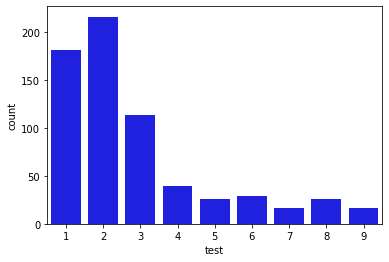

In [20]:
import seaborn as sns

df = election
df = df[df['votes'] != 0]
df['test'] = df.votes.apply(lambda x : int(str(x)[0]))
df = df[df['test'] != 0]
#df['test'].value_counts().plot(kind ='bar')
sns.countplot(data=df, x = 'test', color = 'b')

In [21]:
election.affiliation.unique()

array(['United for Hungary', 'Fidesz/KDNP', 'MKKP', 'Our Country', 'MEMO',
       'Normal party', 'Others'], dtype=object)

In [22]:
fd = election[election['affiliation'] == 'Fidesz/KDNP']
fd.votes.sum()

2823419

In [23]:
election.district.nunique()

106

In [24]:
ben = df.groupby('test').count()
Benford_digits = [
30.1,
17.6,
12.5,
9.7,
7.9,
6.7,
5.8,
5.1,
4.6
]

ben['exp'] = Benford_digits

In [25]:
ben = ben.drop(columns = ['name', 'relative', 'district'])
ben['measured'] = ben['votes']/sum(ben['votes'])*100
ben['test'] = ben.index

In [26]:
import scipy.stats as stats


#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=ben['measured'].array, f_exp=ben['exp'].array)


Power_divergenceResult(statistic=22.091396760820214, pvalue=0.00474933911389331)

<AxesSubplot:xlabel='test'>

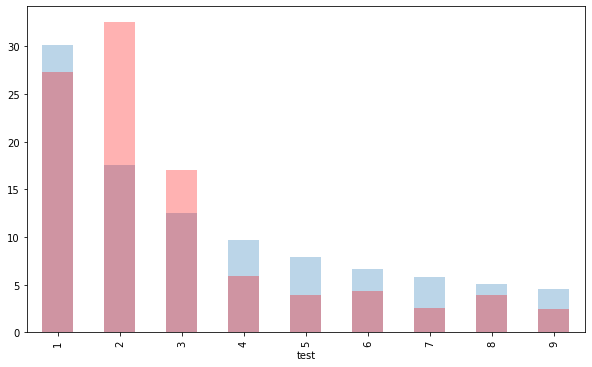

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ben['exp'].plot(kind='bar', alpha = 0.3)
ben['measured'].plot(kind='bar', color = 'r', alpha = 0.3)

<AxesSubplot:xlabel='test', ylabel='exp'>

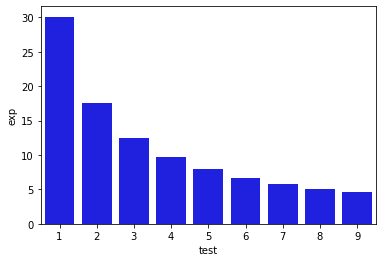

In [28]:
sns.barplot(data=ben, y = 'exp', x = 'test' ,color = 'b')

<AxesSubplot:xlabel='test', ylabel='value'>

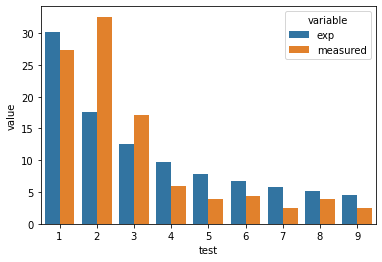

In [29]:
lol = pd.melt(ben, id_vars=['test'], value_vars=['exp', 'measured' ])
sns.barplot(data=lol, y = 'value', x='test', hue ='variable')

In [30]:
blab = df.groupby('name').mean().sort_values(by= 'votes', ascending = False)
blab['%'] = blab['votes'].apply(lambda x: (float(x)/float(blab.votes.sum()))*100)
blab

,votes,relative,test,%
name,,,,
DR. VITÁLYOS ESZTER,36877.0,51.94,3.0,0.691533
PÁNCZÉL KÁROLY,35513.0,56.81,3.0,0.665954
HISZÉKENY DEZSŐ,35248.0,60.53,3.0,0.660985
GYOPÁROS ALPÁR,35119.0,71.22,3.0,0.658566
MENCZER TAMÁS,34810.0,46.77,3.0,0.652771
...,...,...,...,...
HEGEDÜS MÁTÉ,71.0,0.14,7.0,0.001331
KÓTAI GYULA,69.0,0.15,6.0,0.001294
BARABÁS GYÖRGY,56.0,0.10,5.0,0.001050


In [31]:
blab.votes.sum()

5332648.0